Tropical climate zones
Classification after Temperature

After "Köppen-climate" Classifikation the equatorial climate or tropical climate refers to areas, where the average temperature of the coldest month is above 18 °C. These areas mainly ly between 23.5° N and 23.5° S. It should be noticed that not all areas between this latitudes fullfill the Temperature criterium for reasons like the elevation.

In [2]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

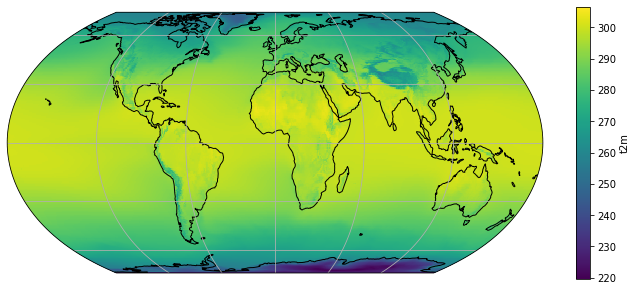

In [3]:
#classification with temperature
ds = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Monthly_t2m.nc')
#only land data
nc_inv = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Invariant.nc')

t2m = ds.t2m
t_mean = t2m.mean(dim = 'time')
#plotting
ax = plt.axes(projection = ccrs.EqualEarth())
t_mean.plot(ax = ax, transform = ccrs.PlateCarree())
ax.coastlines(); ax.gridlines();

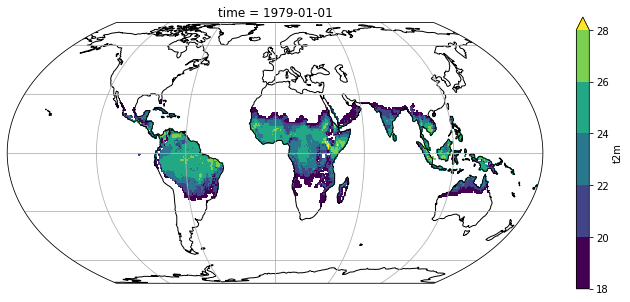

In [58]:
# monthly average temperature
t_month_avg = t2m.groupby('time.month').mean()
t_min = t_month_avg.min(dim='month') - 273.15
#t_month_avg_diff = t_month_avg.max(dim='month') - t_month_avg.min(dim='month')

#tropics are defined as areas with a min average T of 18°C in the coldest month
tropics = t_min.where(t_min >= 18)
tropics = tropics.where(nc_inv.lsm > 0.5)

#plotting
ax = plt.axes(projection = ccrs.EqualEarth())
#t_min.plot(ax = ax, transform = ccrs.PlateCarree())
tropics.plot(ax = ax, transform = ccrs.PlateCarree(), levels = [18, 20, 22, 24, 26, 28])
#tropics.plot.contour(ax = ax, transform = ccrs.PlateCarree(), levels = 1, colors = 'magenta')
ax.coastlines(); ax.gridlines();

In [19]:
ds = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Monthly_tp.nc')

#monthly precipitation
p_mon_avg = ds.tp.groupby('time.month').mean() * 1000 * 30
p_min = p_mon_avg.min(dim = 'month')
print(p_min.max())

<xarray.DataArray 'tp' ()>
array(1057.0435791)


In [17]:
ds.info()


xarray.Dataset {
dimensions:
	longitude = 480 ;
	latitude = 241 ;
	time = 480 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 tp(time, latitude, longitude) ;
		tp:units = m ;
		tp:long_name = Total precipitation ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2019-11-18 09:30:18 GMT by grib_to_netcdf-2.14.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -o /cache/data6/adaptor.mars.internal-1574069158.6891544-6829-11-3cc28eae-3777-426d-a5fe-bd3c8ecce585.nc /cache/tmp/3cc28eae-3777-426d-a5fe-bd3c8ecce585-adaptor.mars.internal-1574069158.6900353-6829-4-tmp.grib ;
}

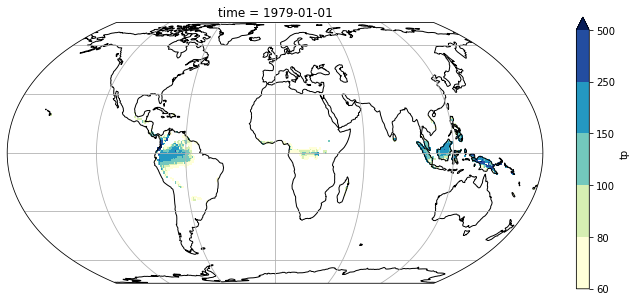

In [48]:
ds = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Monthly_tp.nc')
#only land data
nc_inv = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Invariant.nc')

#monthly precipitation
p_mon_avg = ds.tp.groupby('time.month').mean() * 1000 * 30
#p_mon_avg = p_mon_avg.mean(dim='month')
p_min = p_mon_avg.min(dim='month') 

#tropical rainforest
rainforest = p_min.where(p_min >= 60)
rainforest = rainforest.where(t_min >= 18)
rainforest = rainforest.where(nc_inv.lsm > 0.5)

#plotting
ax = plt.axes(projection = ccrs.EqualEarth())
#p_min.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'YlGnBu', levels = [10, 20, 30, 40, 50, 60, 100, 250, 500, 1000])
#p_min.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'YlGnBu', levels = [0, 60])
rainforest.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'YlGnBu', levels = [60, 80, 100, 150, 250, 500])
#rainforest.plot.contour(ax = ax, transform = ccrs.PlateCarree(), colors = 'magenta')
ax.coastlines(); ax.gridlines();


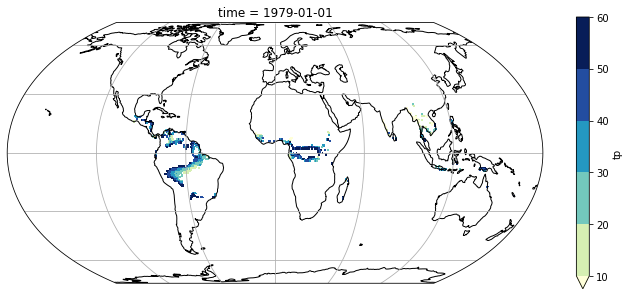

In [50]:
#tropical monsoon
p_anual_avg = ds.tp.groupby('time.year').sum() * 1000 * 30
p_anual_avg = p_anual_avg.mean(dim = 'year')
p_range = 100 - p_anual_avg/25

monsoon = p_min.where(p_min >= p_range)
monsoon = monsoon.where(monsoon < 60)
monsoon = monsoon.where(t_min >= 18)
monsoon = monsoon.where(nc_inv.lsm > 0.5)

#plotting
ax = plt.axes(projection = ccrs.EqualEarth())
#p_min.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'YlGnBu', levels = [10, 20, 30, 40, 50, 60, 100, 250, 500, 1000])
monsoon.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'YlGnBu', levels = [10, 20, 30, 40, 50, 60])
#monsoon.plot.contour(ax = ax, transform = ccrs.PlateCarree(), colors = 'magenta')
ax.coastlines(); ax.gridlines();

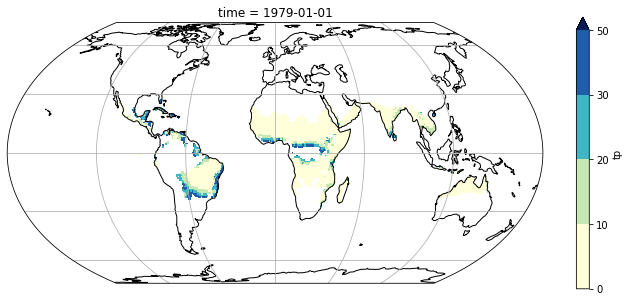

In [56]:
#savanna
p_range = 100 - p_anual_avg/25

savanna = p_min.where(p_min < p_range)
savanna = savanna.where(t_min >= 18)
savanna = savanna.where(nc_inv.lsm > 0.5)

#plotting
ax = plt.axes(projection = ccrs.EqualEarth())
#p_min.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'YlGnBu', levels = [10, 20, 30, 40, 50, 60, 100, 250, 500, 1000])
savanna.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'YlGnBu', levels = [0, 10, 20, 30, 50])
#monsoon.plot.contour(ax = ax, transform = ccrs.PlateCarree(), colors = 'magenta')
ax.coastlines(); ax.gridlines();
